![](figures/def_4.png)
[Source](https://openreview.net/forum?id=r1eBeyHFDH)

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def get_dataset(classes, features, samples):
    X = np.array([[np.random.normal(c, .5, features) for _ in range(samples)] 
                  for c in range(classes)]).reshape(samples*classes,features)
    Y = np.array([[c]*samples for c in range(classes)]).reshape(samples*classes)
    return X, Y

Dataset: (64, 8) (64,)


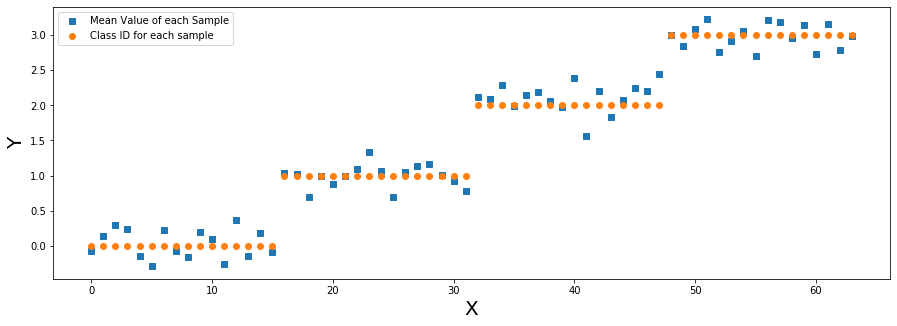

In [3]:
classes = 4
features = 8
samples_per_class = 16

X, Y = get_dataset(classes, features, samples_per_class)
print("Dataset:", X.shape, Y.shape)


plt.figure(figsize=(15,5))
plt.plot(X.mean(1), "s", label="Mean Value of each Sample")
plt.plot(Y, "o", label= "Class ID for each sample")
plt.xlabel("X",size =20)
plt.ylabel("Y",size =20)
plt.legend()

In [4]:
def get_best_estimation_of_probability(Y):
    _u, _l = np.unique(Y, return_inverse=True)    
    return np.histogram(_l, bins=np.arange(_u.size+1))[0][_l] / _l.size

def get_best_estimation_of_conditional_probability(X,Y):
    return np.array([norm(loc=X[i].mean(), scale=X[i].std()).pdf(np.unique(Y))[Y[i]] for i in range(X.shape[0])])

def get_v_entropy(Y):
    f_null_Y = get_best_estimation_of_probability(Y)
    log_value = -np.log(f_null_Y)
    inf_value = log_value.sum()/len(Y)
    return inf_value

def get_cond_v_entropy(X, Y):
    f_X_Y = get_best_estimation_of_conditional_probability(X,Y)
    log_value = -np.log(f_X_Y)
    inf_value = log_value.sum()/len(Y)
    return inf_value

In [5]:

v_entropy = get_v_entropy(Y)
print("First Term: ",v_entropy)

cond_v_entropy = get_cond_v_entropy(X, Y)
print("Second Term: ", cond_v_entropy)

print("v_information (X, Y; dataset):", v_entropy - cond_v_entropy)

First Term:  1.3862943611198906
Second Term:  0.19279600634638855
v_information (X, Y; dataset): 1.193498354773502
